<h1><center> A Deep Learning Approach to Predicting Human Action Using Smartphone Sensors Data  

In [1]:
import os
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix

## saving files in one csv

In [2]:
columns = ['ID', 'Action','Timestamp', 'x','y','z']

def load_text_files_from_folder_with_dataset(folder_path, dataset_name):
    dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                data = [line.strip().split(',') for line in lines]
                df = pd.DataFrame(data, columns=columns)
                df['dataset'] = dataset_name
                dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

# Paths to the folders containing text files
accel_phone_folder_path = r"wisdm-dataset\raw\phone\accel"
gyro_phone_folder_path = r"wisdm-dataset\raw\phone\accel"

# Names of the datasets
accel_phone_dataset_name = "Phone_Accel_data"
gyro_phone_dataset_name = "Phone_Gyro_data"

# Create empty datasets with predefined columns

accel_phone_dataset = pd.DataFrame(columns=columns + ['dataset'])
gyro_phone_dataset = pd.DataFrame(columns=columns + ['dataset'])


# Load text files from the folders into the datasets with dataset columns
accel_phone_data = load_text_files_from_folder_with_dataset(accel_phone_folder_path, accel_phone_dataset_name)
gyro_phone_data = load_text_files_from_folder_with_dataset(gyro_phone_folder_path, gyro_phone_dataset_name)

# Concatenate the datasets
df4 = pd.concat([accel_phone_dataset, accel_phone_data, gyro_phone_dataset, gyro_phone_data], ignore_index=True)

# Display the combined dataset
df4

,ID,Action,Timestamp,x,y,z,dataset
0,1600,A,252207666810782,-0.36476135,8.793503,1.0550842;,Phone_Accel_data
1,1600,A,252207717164786,-0.8797302,9.768784,1.0169983;,Phone_Accel_data
2,1600,A,252207767518790,2.0014954,11.10907,2.619156;,Phone_Accel_data
3,1600,A,252207817872794,0.45062256,12.651642,0.18455505;,Phone_Accel_data
4,1600,A,252207868226798,-2.1643524,13.928436,-4.4224854;,Phone_Accel_data
...,...,...,...,...,...,...,...
9608801,1650,S,357734078421000,-8.234077,-4.2751102,-1.4394068;,Phone_Gyro_data
9608802,1650,S,357734098619000,-8.080796,-4.4188113,-1.4154567;,Phone_Gyro_data
9608803,1650,S,357734118715000,-7.9945755,-4.4571314,-1.4418018;,Phone_Gyro_data
9608804,1650,S,357734138868000,-8.040081,-4.366121,-1.4968873;,Phone_Gyro_data


In [3]:
Action_Data = df4.to_csv('Action_Data.csv', index=False)

## Data Preprocessing

In [4]:
Action = pd.read_csv('Action_Data.csv')

In [5]:
Action

,ID,Action,Timestamp,x,y,z,dataset
0,1600,A,252207666810782,-0.364761,8.793503,1.0550842;,Phone_Accel_data
1,1600,A,252207717164786,-0.879730,9.768784,1.0169983;,Phone_Accel_data
2,1600,A,252207767518790,2.001495,11.109070,2.619156;,Phone_Accel_data
3,1600,A,252207817872794,0.450623,12.651642,0.18455505;,Phone_Accel_data
4,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;,Phone_Accel_data
...,...,...,...,...,...,...,...
9608801,1650,S,357734078421000,-8.234077,-4.275110,-1.4394068;,Phone_Gyro_data
9608802,1650,S,357734098619000,-8.080796,-4.418811,-1.4154567;,Phone_Gyro_data
9608803,1650,S,357734118715000,-7.994575,-4.457131,-1.4418018;,Phone_Gyro_data
9608804,1650,S,357734138868000,-8.040081,-4.366121,-1.4968873;,Phone_Gyro_data


In [6]:
Action['Timestamp'] /= 1e9
Action.head()

,ID,Action,Timestamp,x,y,z,dataset
0,1600,A,252207.666811,-0.364761,8.793503,1.0550842;,Phone_Accel_data
1,1600,A,252207.717165,-0.879730,9.768784,1.0169983;,Phone_Accel_data
2,1600,A,252207.767519,2.001495,11.109070,2.619156;,Phone_Accel_data
3,1600,A,252207.817873,0.450623,12.651642,0.18455505;,Phone_Accel_data
4,1600,A,252207.868227,-2.164352,13.928436,-4.4224854;,Phone_Accel_data


In [7]:
Action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608806 entries, 0 to 9608805
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   Action     object 
 2   Timestamp  float64
 3   x          float64
 4   y          float64
 5   z          object 
 6   dataset    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 513.2+ MB


In [8]:
Action['z'] = Action['z'].str.replace(';', '').astype(float)
Action['z'] = pd.to_numeric(Action['z'], errors='coerce')
Action['x'] = pd.to_numeric(Action['x'], errors='coerce')
Action['y'] = pd.to_numeric(Action['y'], errors='coerce')

In [9]:
Action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608806 entries, 0 to 9608805
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   Action     object 
 2   Timestamp  float64
 3   x          float64
 4   y          float64
 5   z          float64
 6   dataset    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 513.2+ MB


In [10]:
df1 = Action[Action['dataset']=='Phone_Accel_data']
df2 = Action[Action['dataset']=='Phone_Gyro_data']

In [11]:
df1.head()

,ID,Action,Timestamp,x,y,z,dataset
0,1600,A,252207.666811,-0.364761,8.793503,1.055084,Phone_Accel_data
1,1600,A,252207.717165,-0.879730,9.768784,1.016998,Phone_Accel_data
2,1600,A,252207.767519,2.001495,11.109070,2.619156,Phone_Accel_data
3,1600,A,252207.817873,0.450623,12.651642,0.184555,Phone_Accel_data
4,1600,A,252207.868227,-2.164352,13.928436,-4.422485,Phone_Accel_data


In [12]:
df2.head()

,ID,Action,Timestamp,x,y,z,dataset
4804403,1600,A,252207.666811,-0.364761,8.793503,1.055084,Phone_Gyro_data
4804404,1600,A,252207.717165,-0.879730,9.768784,1.016998,Phone_Gyro_data
4804405,1600,A,252207.767519,2.001495,11.109070,2.619156,Phone_Gyro_data
4804406,1600,A,252207.817873,0.450623,12.651642,0.184555,Phone_Gyro_data
4804407,1600,A,252207.868227,-2.164352,13.928436,-4.422485,Phone_Gyro_data


In [13]:
display(df1['Action'].value_counts())

K    285190
A    279817
M    278766
P    272730
O    272219
H    270756
G    269609
E    269604
B    268409
R    268065
L    265781
S    265214
D    264592
I    261360
Q    260497
C    255645
J    249793
F    246356
Name: Action, dtype: int64

In [14]:
display(df2['Action'].value_counts())

K    285190
A    279817
M    278766
P    272730
O    272219
H    270756
G    269609
E    269604
B    268409
R    268065
L    265781
S    265214
D    264592
I    261360
Q    260497
C    255645
J    249793
F    246356
Name: Action, dtype: int64

In [15]:
actions = Action['Action'].value_counts().index

In [16]:
actions

Index(['K', 'A', 'M', 'P', 'O', 'H', 'G', 'E', 'B', 'R', 'L', 'S', 'D', 'I',
       'Q', 'C', 'J', 'F'],
      dtype='object')

### Exploratory Data Analysis

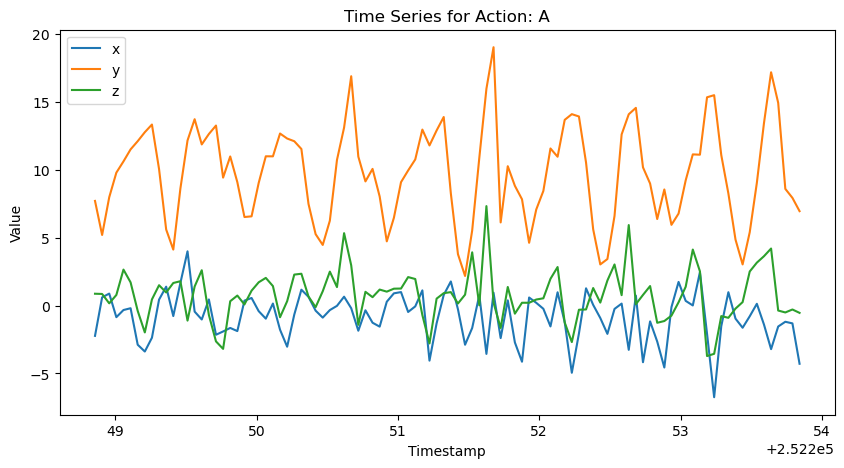

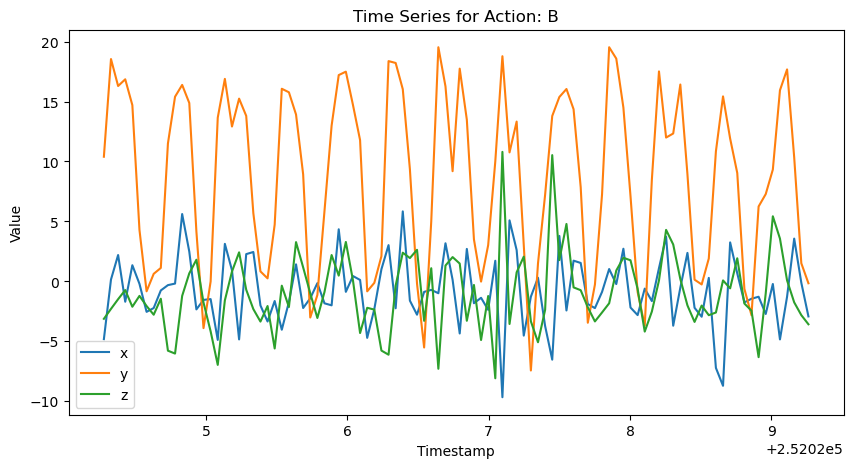

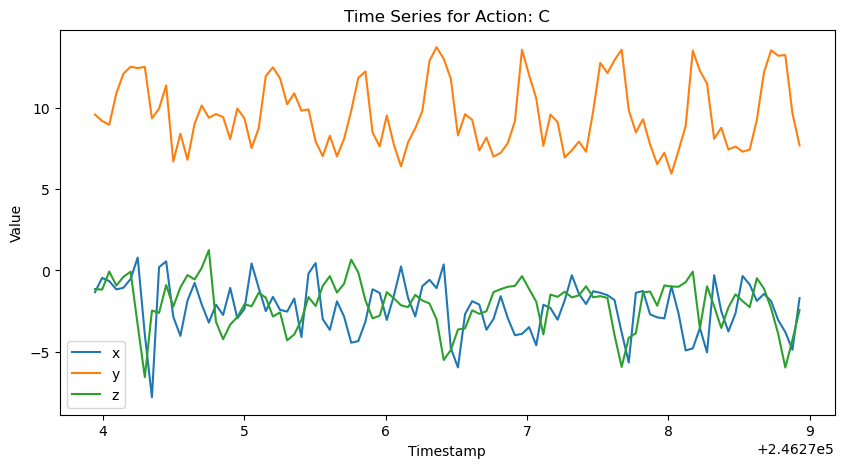

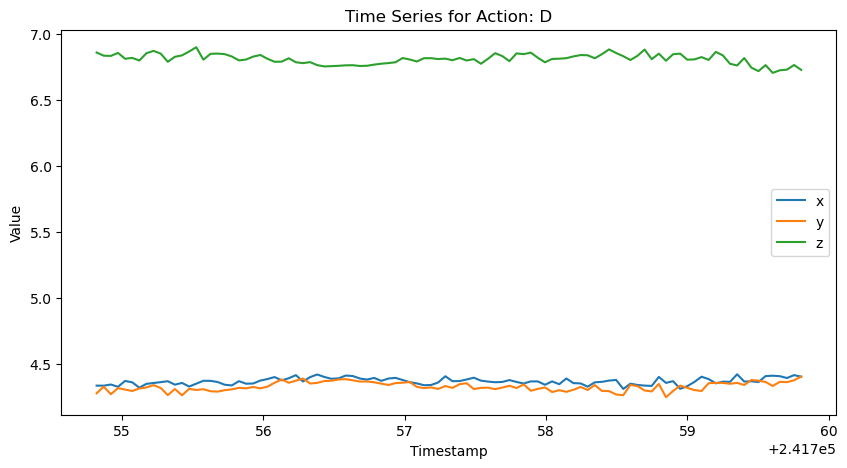

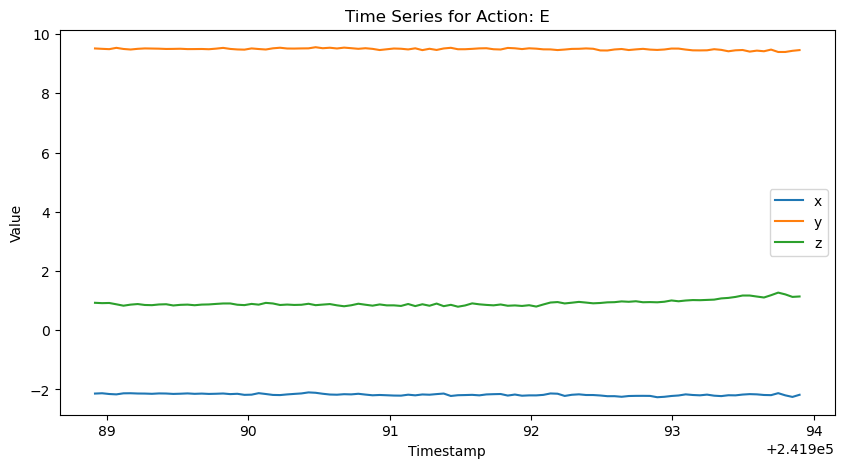

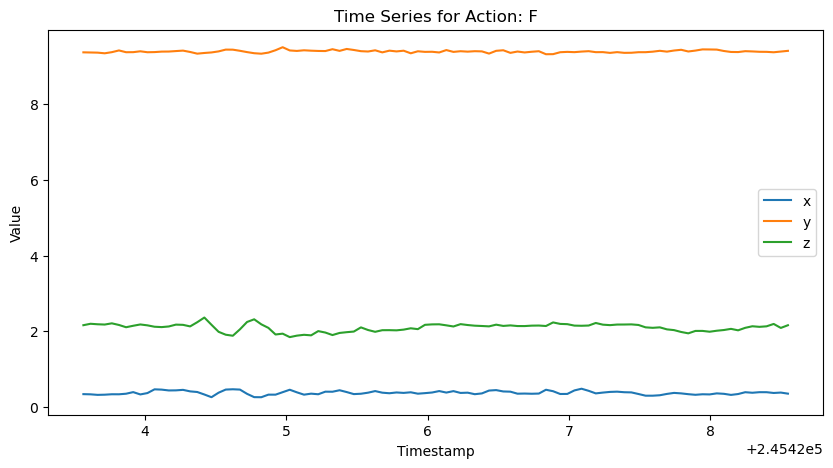

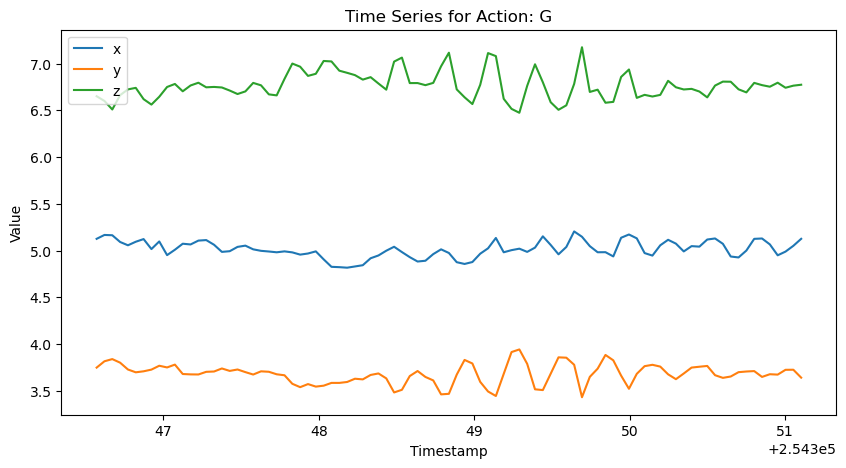

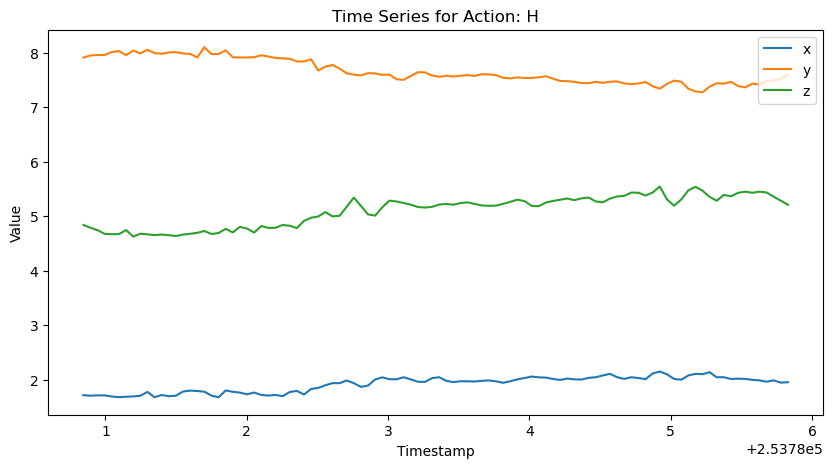

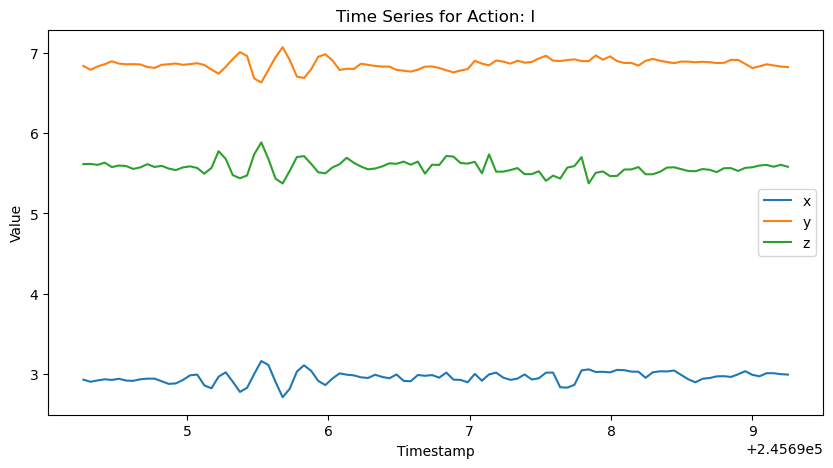

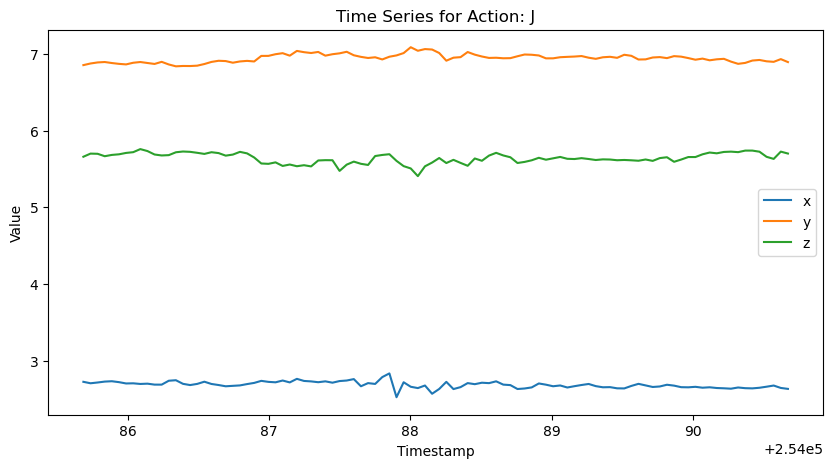

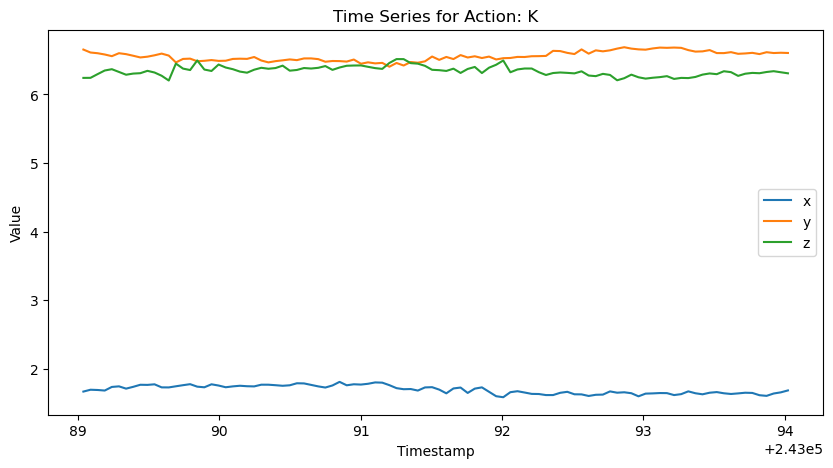

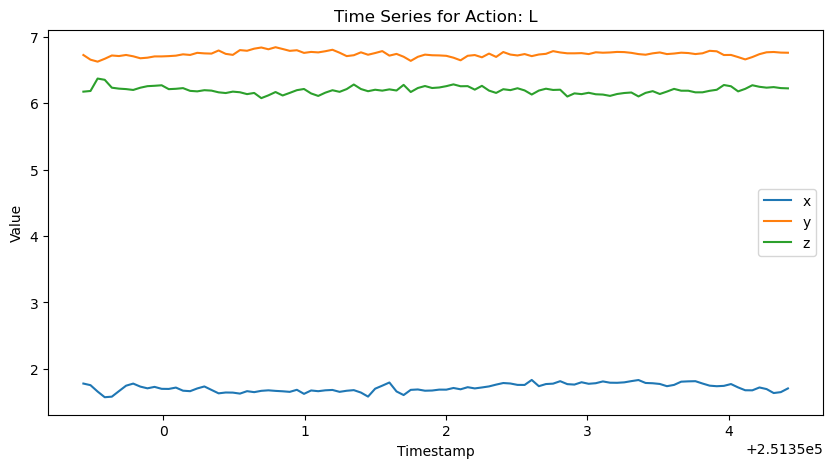

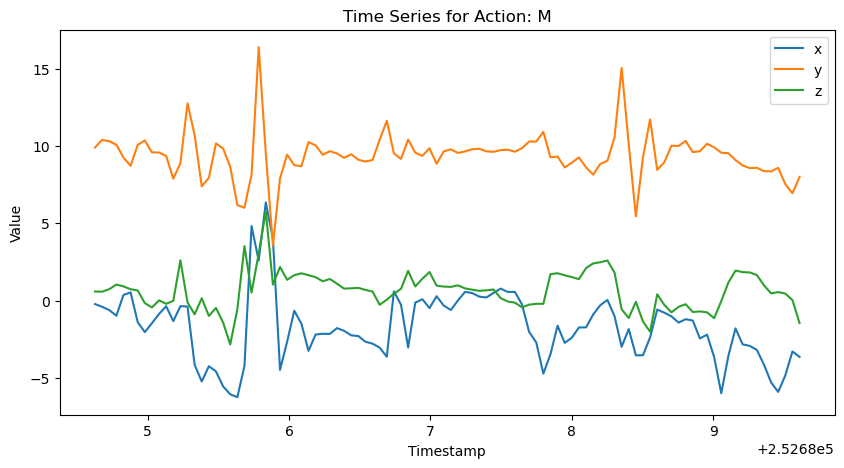

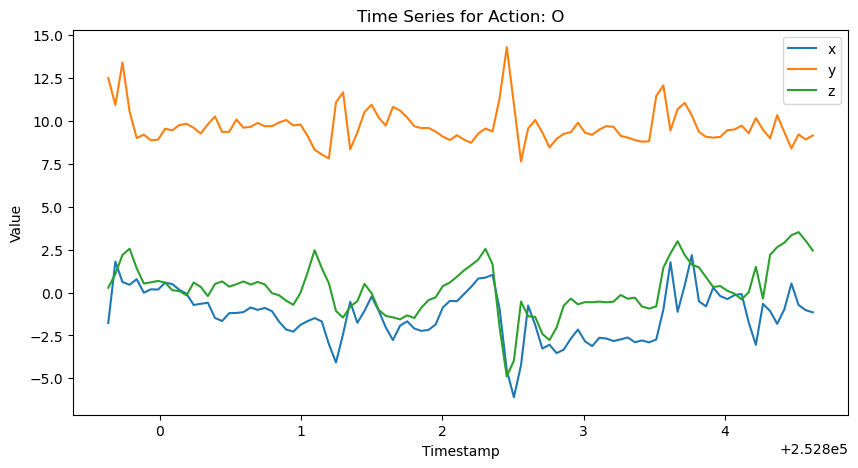

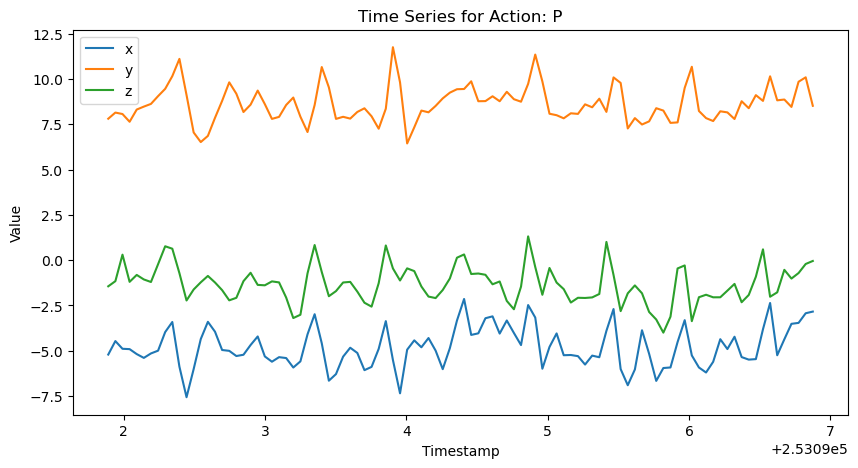

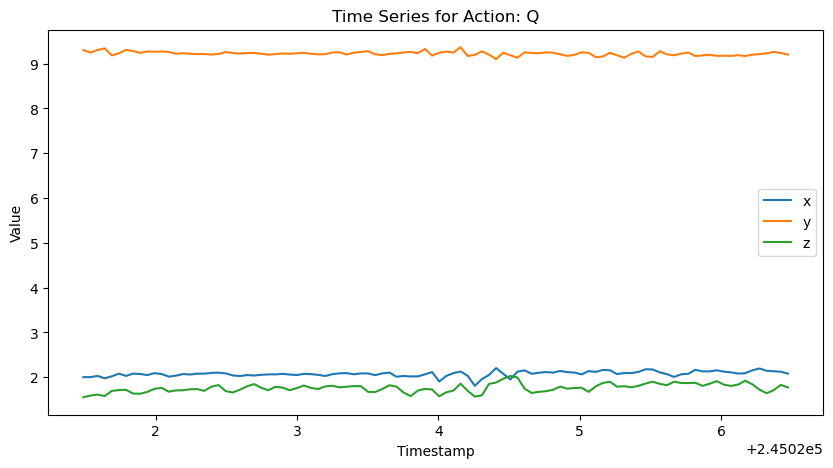

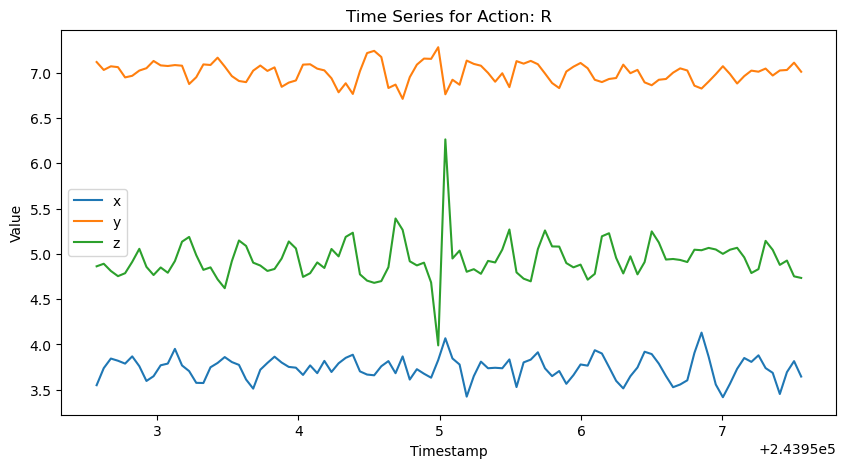

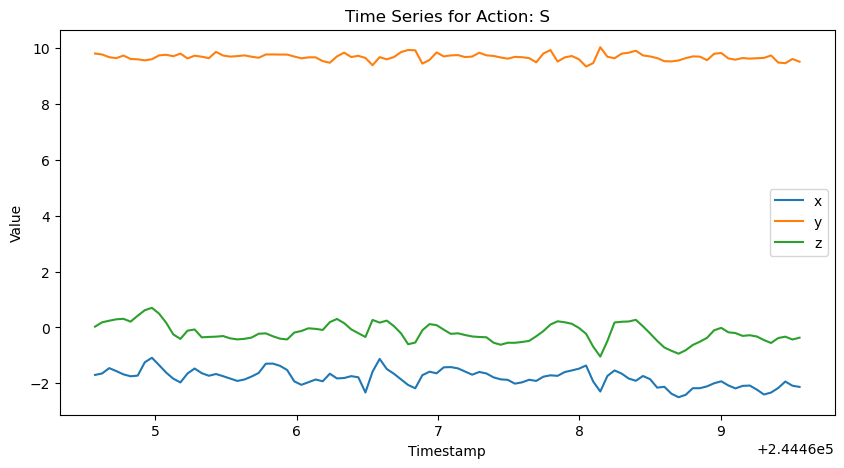

In [17]:
df1_id1600 = df1[df1['ID'] == 1600]
df1_id1600_sorted = df1_id1600.sort_values(['Action', 'Timestamp'])

selected_rows = []

grouped = df1_id1600_sorted.groupby('Action')

for action, group in grouped:
    first_row = group.sample(n=1)
    next_rows = group.iloc[group.index.get_loc(first_row.index[0]) + 1: group.index.get_loc(first_row.index[0]) + 100]
    selected = pd.concat([first_row, next_rows])
    selected_rows.append(selected)

df1_id1600_sampled = pd.concat(selected_rows)

unique_actions = sorted(df1_id1600_sampled['Action'].unique())

for action in unique_actions:
    df_action = df1_id1600_sampled[df1_id1600_sampled['Action'] == action]
    
    plt.figure(figsize=(10, 5))
    plt.title(f'Time Series for Action: {action}')

    plt.plot(df_action['Timestamp'], df_action['x'], label='x')
    plt.plot(df_action['Timestamp'], df_action['y'], label='y')
    plt.plot(df_action['Timestamp'], df_action['z'], label='z')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

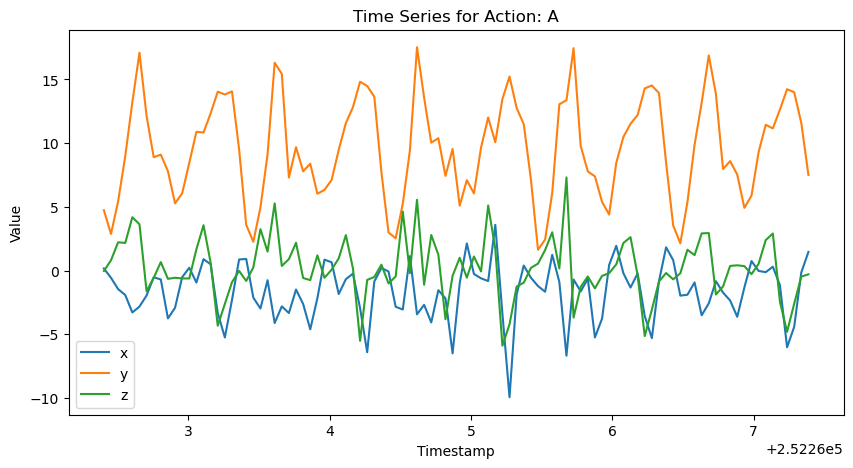

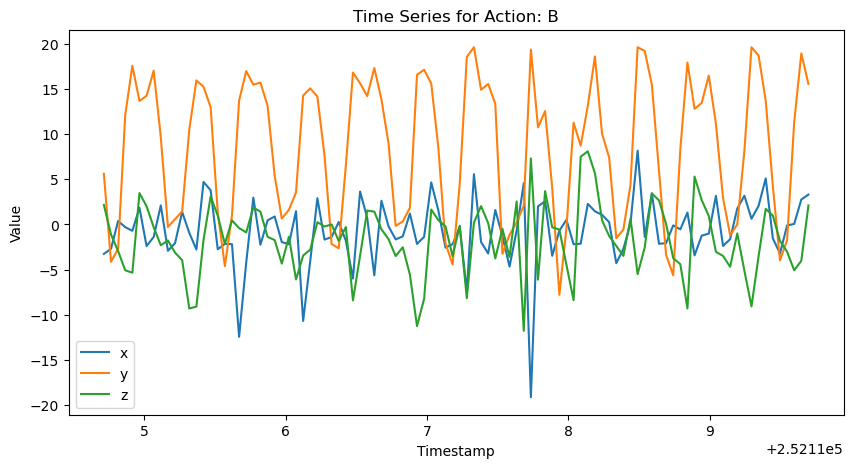

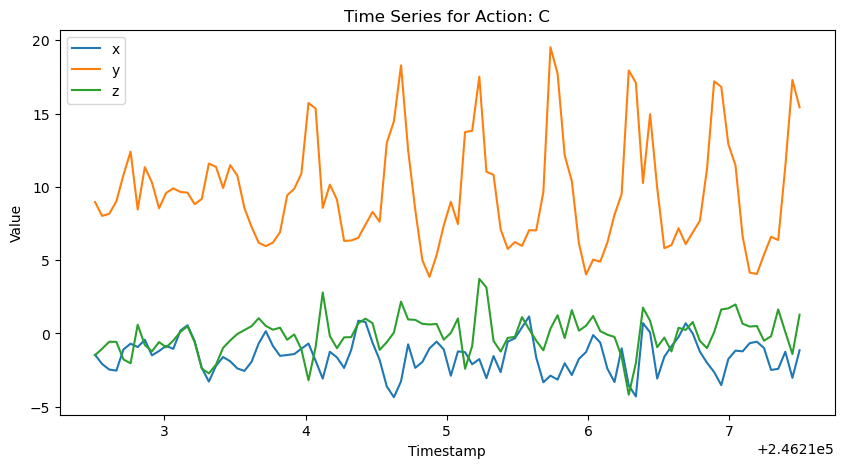

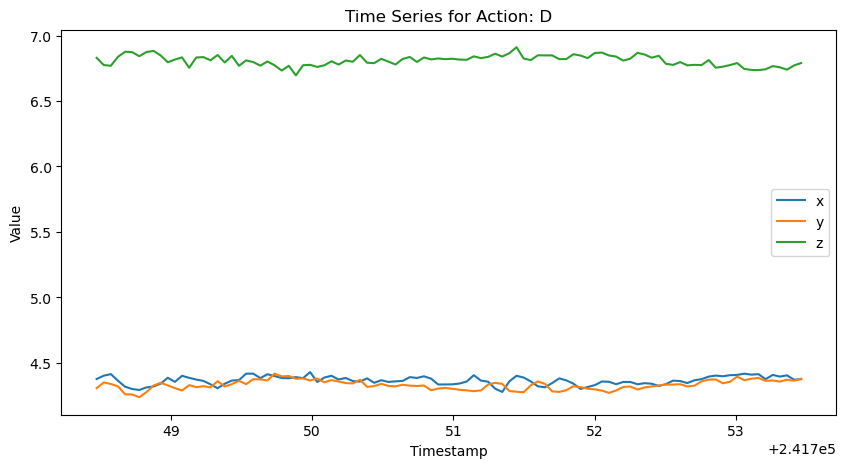

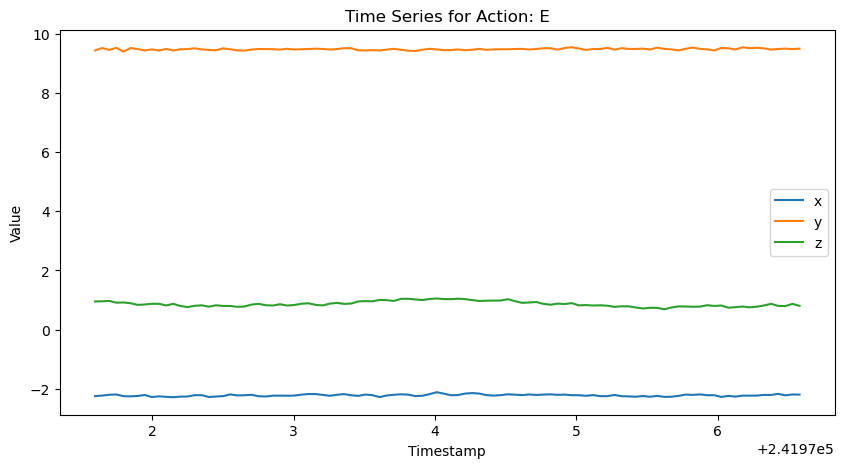

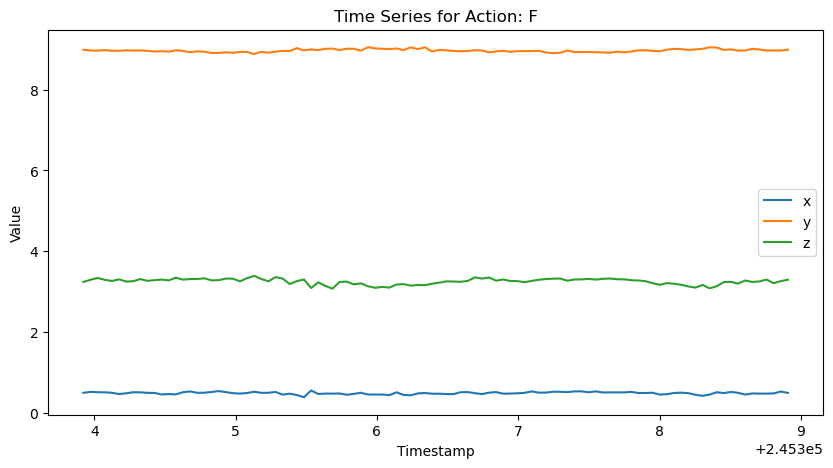

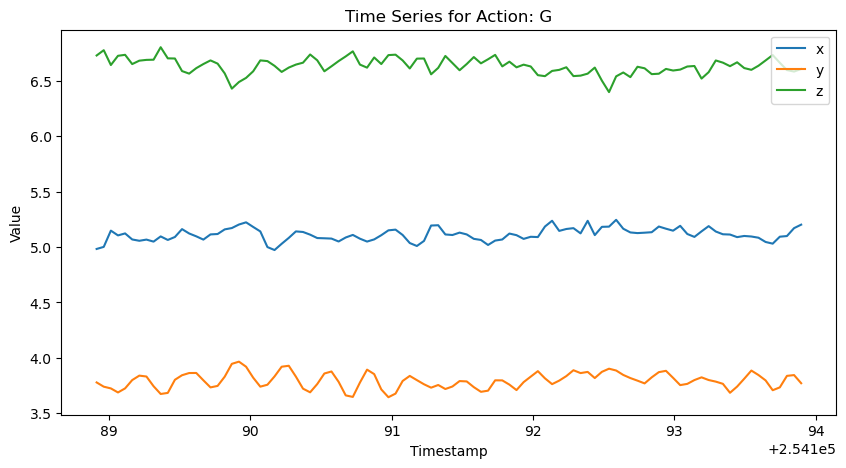

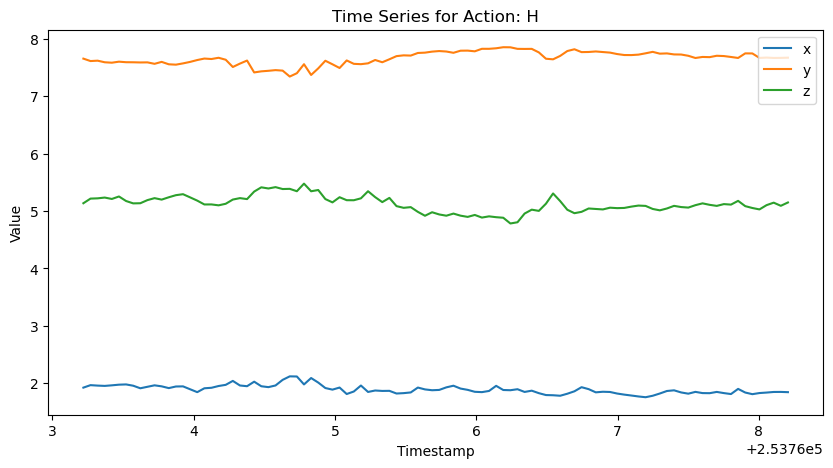

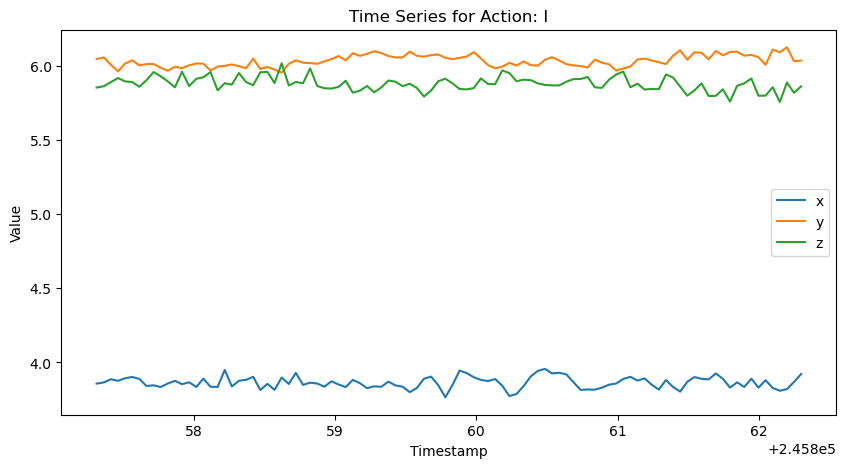

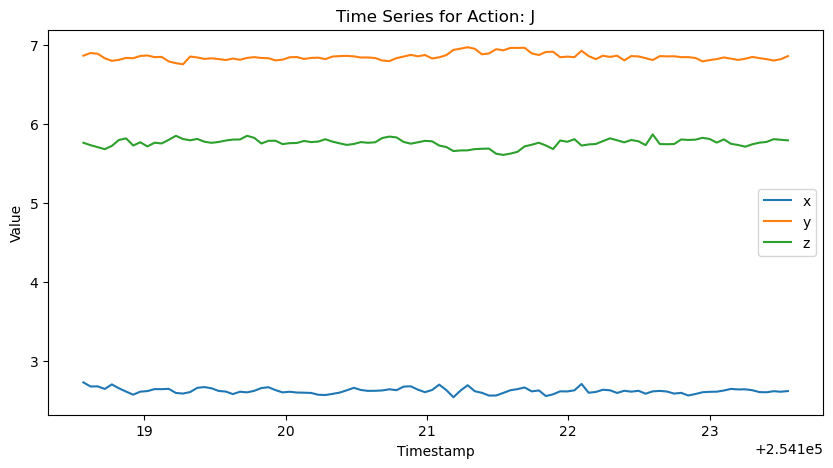

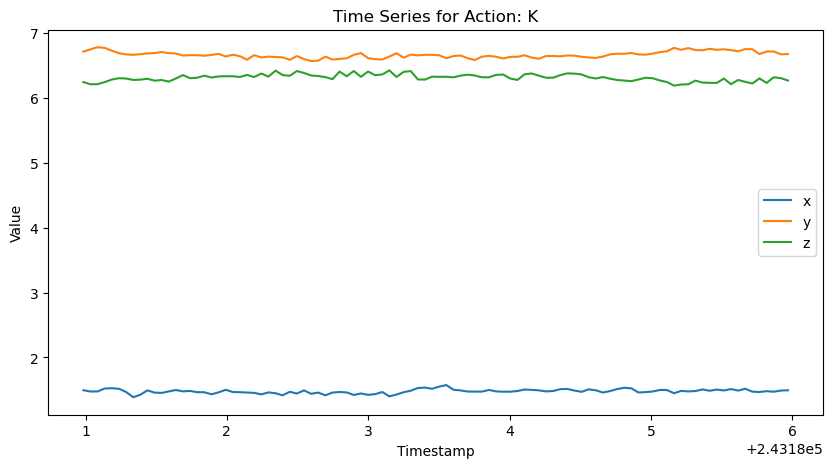

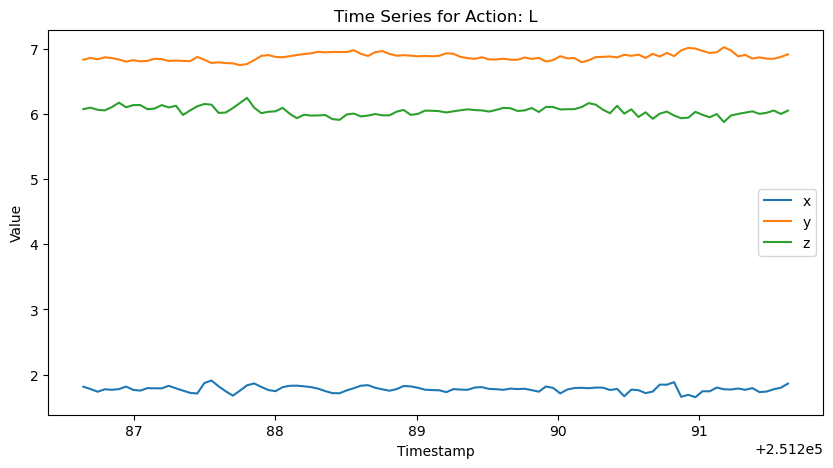

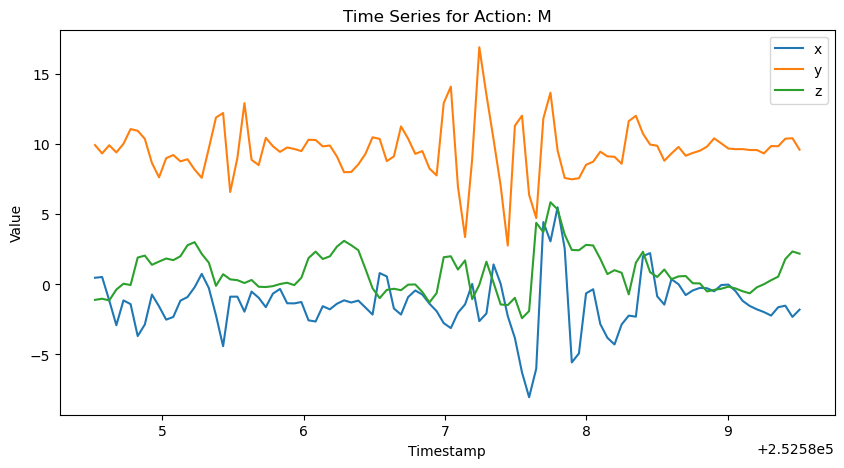

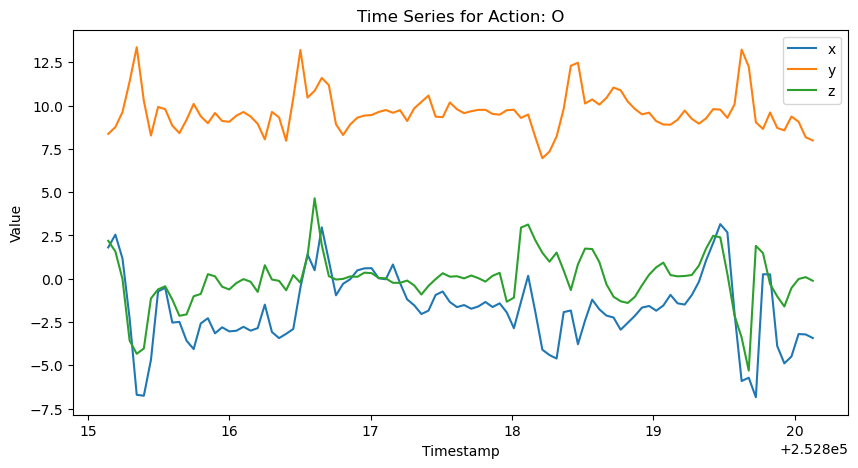

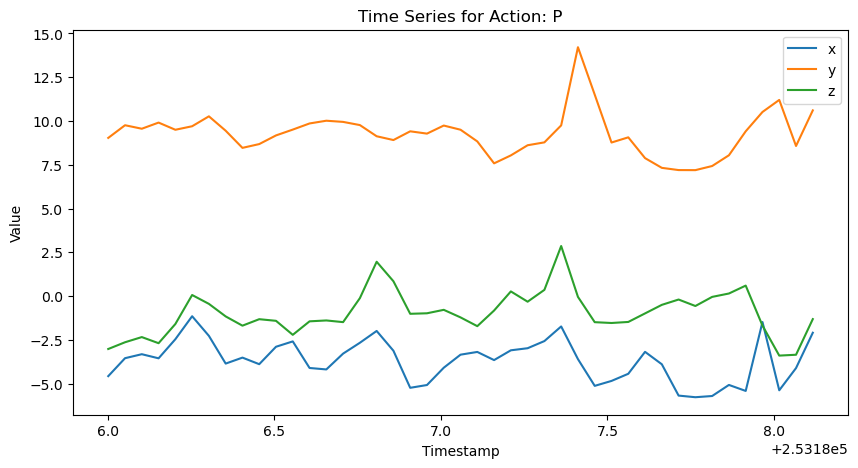

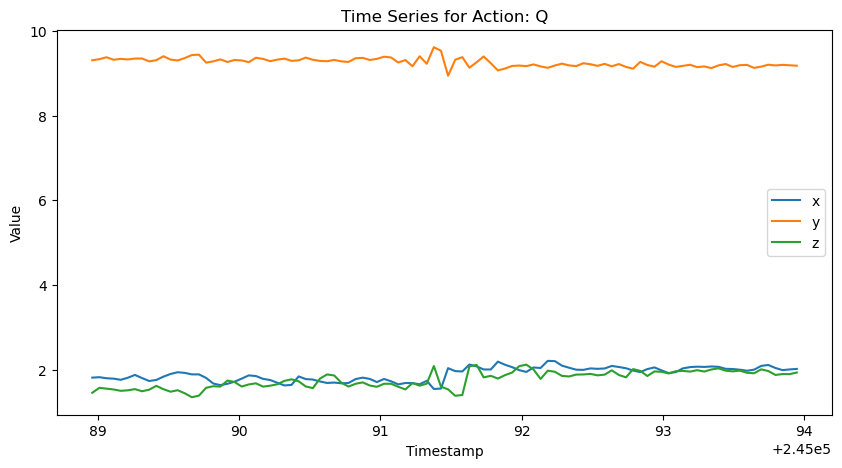

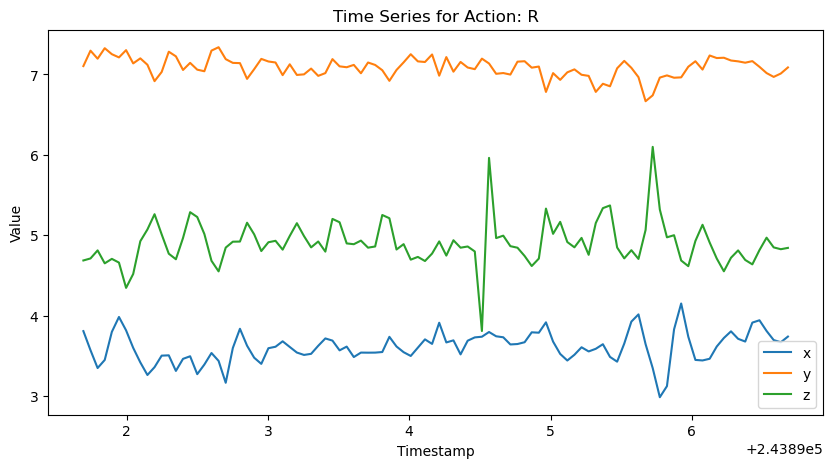

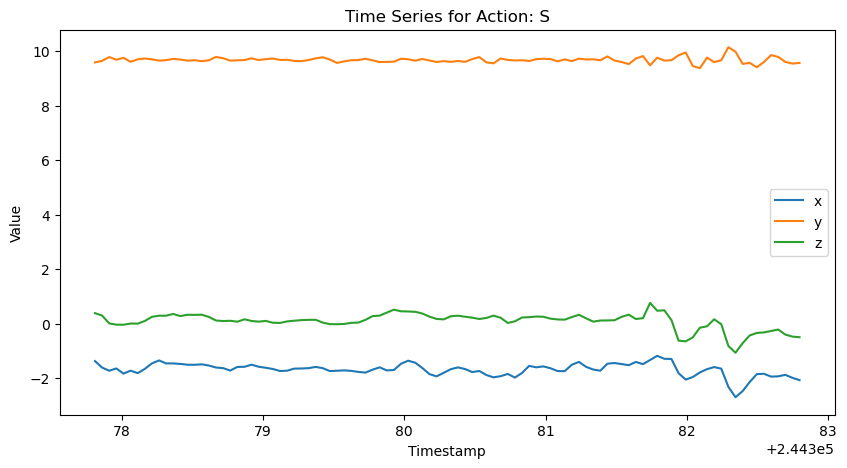

In [18]:
df2_id1600 = df2[df2['ID'] == 1600]
df2_id1600_sorted = df2_id1600.sort_values(['Action', 'Timestamp'])

selected_rows = []

grouped = df2_id1600_sorted.groupby('Action')

for action, group in grouped:
    first_row = group.sample(n=1)
    next_rows = group.iloc[group.index.get_loc(first_row.index[0]) + 1: group.index.get_loc(first_row.index[0]) + 100]
    selected = pd.concat([first_row, next_rows])
    selected_rows.append(selected)

df2_id1600_sampled = pd.concat(selected_rows)

unique_actions = sorted(df2_id1600_sampled['Action'].unique())

for action in unique_actions:
    df_action = df2_id1600_sampled[df2_id1600_sampled['Action'] == action]
    
    plt.figure(figsize=(10, 5))
    plt.title(f'Time Series for Action: {action}')

    plt.plot(df_action['Timestamp'], df_action['x'], label='x')
    plt.plot(df_action['Timestamp'], df_action['y'], label='y')
    plt.plot(df_action['Timestamp'], df_action['z'], label='z')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [65]:
def sample_and_filter(df):
    sampled_user = df['ID'].sample(n=1, replace=False).iloc[0]
    filtered_df = df[df['ID'] == sampled_user]
    return filtered_df

filtered_df1 = sample_and_filter(df1)
filtered_df2 = sample_and_filter(df2)

In [66]:
filtered_df1['Action'].value_counts()

M    8936
O    8936
A    8935
B    8935
P    8935
D    8934
E    8933
I    8933
R    8933
H    8932
L    8932
G    8931
J    8931
K    8931
Q    8931
S    8931
Name: Action, dtype: int64

In [68]:
dataframes = [filtered_df1, filtered_df2]

for df in dataframes:
    df = df.copy()
    df.drop(columns=['ID', 'Timestamp', 'dataset'], inplace=True)

filtered_df1, filtered_df2 = dataframes

*** 
<h2> Phone Accelerometer

In [69]:
new_df1 = filtered_df1
phone_accel = new_df1

<h4> Standardizing Data

In [70]:
X = phone_accel[['x', 'y', 'z']]
y = phone_accel['Action']

In [71]:
label = LabelEncoder()
y_label = label.fit_transform(y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.2, random_state=42)

<h4> Splitting Data

In [73]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
scaled_X_test = scaled_X_test.reshape((scaled_X_test.shape[0], scaled_X_test.shape[1], 1))

num_classes = len(label.classes_)

<h2> Creating and Training the Model

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

C:\Users\Jaymarq\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
history = model.fit(scaled_X_train, y_train, epochs=200, batch_size=512, validation_data=(scaled_X_test, y_test))

Epoch 1/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5810 - loss: 1.1428 - val_accuracy: 0.7682 - val_loss: 0.5986
Epoch 2/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7775 - loss: 0.6250 - val_accuracy: 0.8034 - val_loss: 0.5404
Epoch 3/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7963 - loss: 0.5719 - val_accuracy: 0.8054 - val_loss: 0.5352
Epoch 4/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7982 - loss: 0.5609 - val_accuracy: 0.8195 - val_loss: 0.5019
Epoch 5/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8037 - loss: 0.5418 - val_accuracy: 0.8171 - val_loss: 0.4989
Epoch 6/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8055 - loss: 0.5406 - val_accuracy: 0.8182 - val_loss: 0.4988
Epoch 7/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8069 - loss: 0.5356 - val_accuracy: 0.8219 - val_loss: 0.4974
Epoch 8/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8077 - loss: 0.5367 - val_acc

<h2> Evaluating the Model

In [77]:
loss, accuracy = model.evaluate(scaled_X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8386 - loss: 0.4571
Test Loss: 0.4537602961063385
Test Accuracy: 0.8392220139503479


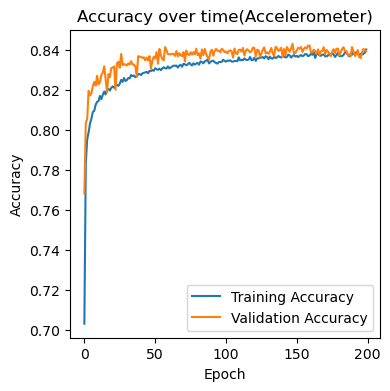

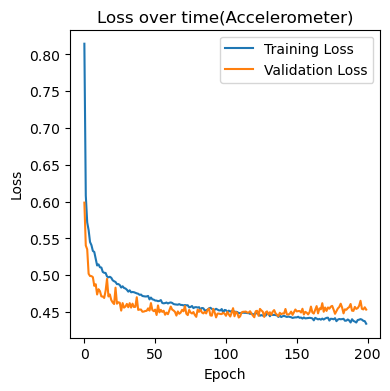

In [78]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over time(Accelerometer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over time(Accelerometer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

In [79]:
y_pred = model.predict(scaled_X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


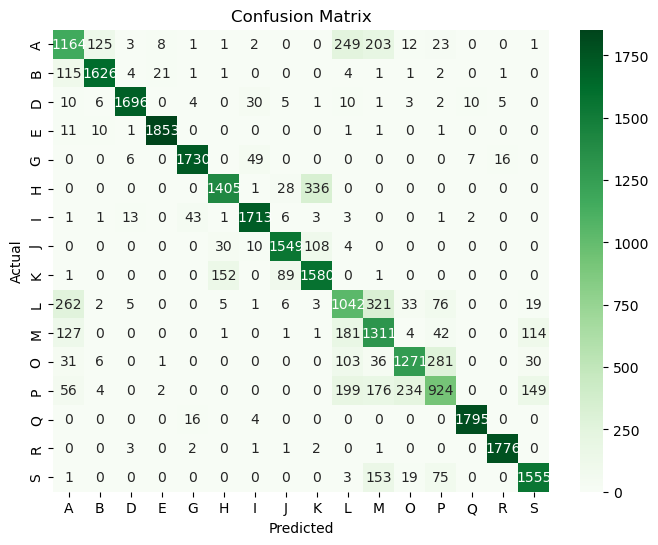

In [80]:
action_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=action_labels, yticklabels=action_labels, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***
<h2> Gyroscope

In [81]:
new_df2 = filtered_df2
phone_gyro = new_df2

In [82]:
X = phone_gyro[['x', 'y', 'z']]
y = phone_gyro['Action']

In [83]:
label = LabelEncoder()
y_label = label.fit_transform(y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
scaled_X_test = scaled_X_test.reshape((scaled_X_test.shape[0], scaled_X_test.shape[1], 1))

num_classes = len(label.classes_)

<h2> Using the same model for Gyroscope Data

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

C:\Users\Jaymarq\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
history = model.fit(scaled_X_train, y_train, epochs=200, batch_size=512, validation_data=(scaled_X_test, y_test))

Epoch 1/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4028 - loss: 1.6423 - val_accuracy: 0.6249 - val_loss: 0.9331
Epoch 2/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6346 - loss: 0.9255 - val_accuracy: 0.6695 - val_loss: 0.8220
Epoch 3/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6645 - loss: 0.8537 - val_accuracy: 0.6814 - val_loss: 0.8031
Epoch 4/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6752 - loss: 0.8330 - val_accuracy: 0.6927 - val_loss: 0.7955
Epoch 5/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6806 - loss: 0.8202 - val_accuracy: 0.7039 - val_loss: 0.7574
Epoch 6/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6892 - loss: 0.8012 - val_accuracy: 0.6979 - val_loss: 0.7689
Epoch 7/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6888 - loss: 0.8010 - val_accuracy: 0.7022 - val_loss: 0.7722
Epoch 8/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6945 - loss: 0.7874 - 

In [89]:
loss, accuracy = model.evaluate(scaled_X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 0.6900
Test Loss: 0.6881730556488037
Test Accuracy: 0.742594838142395


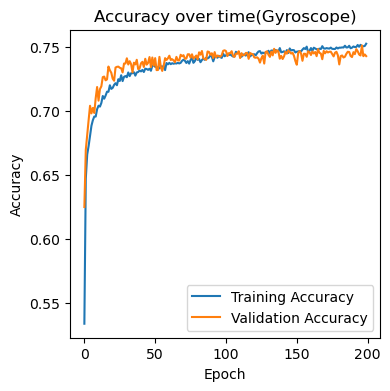

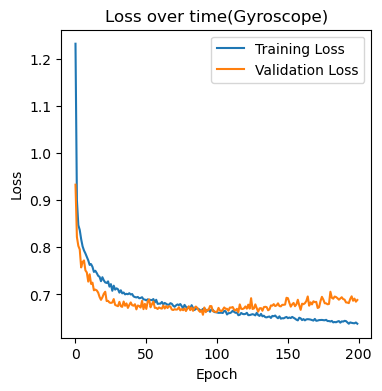

In [91]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over time(Gyroscope)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over time(Gyroscope)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

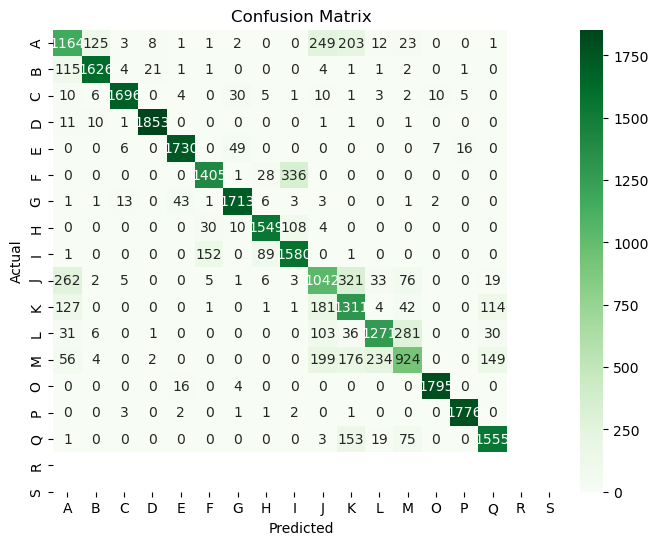

In [92]:
action_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=action_labels, yticklabels=action_labels, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()